In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Import the Data

In [2]:
pro = pd.read_csv("product_details.csv")
cus = pd.read_csv("customer.csv")
ord = pd.read_csv("order_details.csv")

# Clean the Data

### 1. Product Details Data

In [3]:
pro.head()

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [4]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniqe Id               10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

#### 1.1. Check for Null Value 

In [5]:
pro.isnull().sum()                                  # Check for null value  

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64

###### There are many columns with no value at all and also columns with huge amount of missing value, so i decided to drop most of the column
###### and keep those which i find necessary and not have so much missing values

In [6]:
pro = pro.iloc[:, [0,1,4,7,13,25]]                  # Drop columns with no value

#### 1.2. Deal with 'Category' column

###### There are multiple category in 1 cell, separated by a '|', so I decided to create a new Table named Category with mulitiple categories display in one column only

In [7]:
pro['Category'] = pro['Category'].ffill()  
cat = pro[['Uniqe Id','Category']].copy()                        # Create a new table with 'Unique ID' and 'Category' only
cat['Category']= cat['Category'].str.split('|')                  # There are multiple category in 1 cell, separated by a '|' , so I split them
cat = cat.explode('Category').reset_index(drop=True)             # Display each of the category in one row only
cat.head()

,Uniqe Id,Category
0,4c69b61db1fc16e7013b43fc926e502d,Sports & Outdoors
1,4c69b61db1fc16e7013b43fc926e502d,Outdoor Recreation
2,4c69b61db1fc16e7013b43fc926e502d,"Skates, Skateboards & Scooters"
3,4c69b61db1fc16e7013b43fc926e502d,Skateboarding
4,4c69b61db1fc16e7013b43fc926e502d,Standard Skateboards & Longboards


#### 1.3. Deal with 'Selling Price' column

In [8]:
pro['Selling Price'] = pro['Selling Price'].str.replace('$', '')                # Remove the $ symbol from Selling Price
pro['Selling Price'] = pro['Selling Price'].ffill()                             # Fill the 'Selling Price' null values with the above value

# Converts messily formatted cells to standard formatting (From '12.99 - 24.99','1,222.99','12 99', ... to 12.99)
pattern1 = r'^\d{1,3}\.\d{2}$'                                # 12.99 - standard formatting
pattern2 = r'^\d{1,3}\.\d{2} - \d{1,3}\.\d{2}$'               # 12.99 - 24.99
pattern3 = r'^\d{1,3}\,\d{1,3}\.\d{2}$'                       # 1,222.99
pattern4 = r'^\d{1,3}\.\d{2}  \d{1,3} \. \d{2}$'              # 12.99  12 . 99 
pattern5 = r'^Total price:$'                                  # Total Price
pattern6 = r'^\d{1,3}\.\d{2} - \d{1,3}\,\d{1,3}\.\d{2}$'      # 12.99 - 1,111.99
pattern7 = r'^\d{1,3}\.\d{2} \d{1,3}\.\d{2}$'                 # 12.99 12.99 
pattern8 = r'^ \d{1,3} \d{1,3}$'                              # 12 99 
pattern9 = r'^ \d{1,3} \d{1,3} \d{1,3}\.\d{2}.*'              # 19 99 39.95 #listPriceLegalMe ...
pattern10 = r'^\d{1,3}\.\d{1,3}  \d{1,3}$'                    # 8.99 8


for i, data in pro['Selling Price'].items():
    if re.match(pattern1, data):
        pro.loc[i, 'Selling Price'] = data
    elif re.match(pattern2, data):
        price_range = data.split('-')
        lower_bound = price_range[0]
        upper_bound = price_range[1]
        pro.loc[i, 'Selling Price'] = (float(lower_bound) + float(upper_bound)) / 2
    elif re.match(pattern3, data):
        pro.loc[i, 'Selling Price'] = data.replace(',', '')
    elif re.match(pattern4, data):
        values = data.split()
        pro.loc[i, 'Selling Price'] = values[0]
    elif data == 'Total price:':
        pro.loc[i, 'Selling Price'] = pro.loc[i-1, 'Selling Price']
    elif re.match(pattern6, data):
        price_range = data.split('-')
        lower_bound = price_range[0]
        upper_bound = price_range[1].replace(',', '')
        pro.loc[i, 'Selling Price'] = (float(lower_bound) + float(upper_bound)) / 2
    elif re.match(pattern7, data):
        pro.loc[i, 'Selling Price'] = data.split(' ')[0]
    elif re.match(pattern8, data):
        pro.loc[i, 'Selling Price'] = data.replace(' ', '',1).replace(' ', '.',2)
    elif re.match(pattern9, data):
        price_range = data.split()
        lower_bound = price_range[0] + '.' + price_range[1]
        upper_bound = price_range[2]
        pro.loc[i, 'Selling Price'] = (float(lower_bound) + float(upper_bound)) / 2
    elif re.match(pattern10, data):
        pro.loc[i, 'Selling Price'] = data.split()[0]
    else:
        pro.loc[i, 'Selling Price'] = pro.loc[i-1, 'Selling Price']

#### 1.4. Deal with 'Shipping Weight' column

In [9]:
pro['Shipping Weight'] = pro['Shipping Weight'].ffill()                       # Fill 'Shipping Weight' null value with the above value
pro.loc[1619, 'Shipping Weight'] = pro.loc[1618, 'Shipping Weight']           # There is a index that has '.pounds' only so i replace with the above value
pro['Shipping Weight'] = pro['Shipping Weight'].str.replace(',', '.')         # There are some index with '1,88' instead of '1.88', so i replace ',' with '.'

# Turn all value to pounds (the index with ounces will be devided by 16)
for i, data in pro['Shipping Weight'].items():
    if 'pound' in data:
        pro.loc[i, 'Shipping Weight'] = float(data.split()[0])
    elif 'ounce' in data:
        pro.loc[i, 'Shipping Weight'] = float(data.split()[0])/16
    else:
        pro.loc[i, 'Shipping Weight'] = pro.loc[i-1, 'Selling Price']

#### 1.5. Deal with 'Subscription Status' column

In [10]:
# Change value from 'Subscription Status' column to one format
pro['Is Amazon Seller'] = pro['Is Amazon Seller'].str.replace('Y', 'Yes')
pro['Is Amazon Seller'] = pro['Is Amazon Seller'].str.replace('N', 'No')

#### 1.6. Check for Duplicated Value

In [11]:
pro.duplicated().sum()

0

#### 1.7. Convert all columns to suitable type

In [12]:
pro['Selling Price'] = pro['Selling Price'].astype('float')
pro['Shipping Weight'] = pro['Shipping Weight'].astype('float')
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Uniqe Id          10002 non-null  object 
 1   Product Name      10002 non-null  object 
 2   Category          10002 non-null  object 
 3   Selling Price     10002 non-null  float64
 4   Shipping Weight   10002 non-null  float64
 5   Is Amazon Seller  10002 non-null  object 
dtypes: float64(2), object(4)
memory usage: 469.0+ KB


### 2. Customer Data

In [13]:
cus.head()

,ID,Age,Gender,Location
0,sdb5huosnxxfkffuy35wlz610rs8coc7,55,Male,Kentucky
1,aknjq1s2spcia7idfw5wepumiz6deeko,19,Male,Maine
2,pnoo0r4kekut1cd6ipwhhf2wrvcz2v2t,50,Male,Massachusetts
3,tmmqqu7wh0u0ahc6mop0topxirvhgoby,21,Male,Rhode Island
4,jmrgfqd25k8dbenexmbbygwzwbgv4abw,45,Male,Oregon


In [14]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3900 non-null   object
 1   Age       3900 non-null   int64 
 2   Gender    3900 non-null   object
 3   Location  3900 non-null   object
dtypes: int64(1), object(3)
memory usage: 122.0+ KB


###### The Customer Data is pretty nice with no Null Value and the columns are at their suitable types, so I just gonna check for the Duplicated Value only

#### 2.1. Check for Duplcated Value

In [15]:
cus.duplicated().sum()

0

### 3. Order Details Data

In [16]:
ord.head()

,Customer ID,Product ID,Order ID,Order Quantity,Review Rating,Payment Method,Subscription Status,Shipping Type,Discount,Date
0,cmqva4sucpxicgbcuhuiuwmbcuamldsq,d25a70e80b554fdcc4d53a7939a1cd81,qibq5bx9bjf6xlzeu3o7s1poajjxrizy,2,4.8,PayPal,No,Store Pickup,38.21%,2022-01-05
1,7gvjwveptda4cquw00s5j6krp6kperzi,325be9d8fef8ba85153e9f74c42269ba,39flqqbibqqoat80qxzt5ple84f8mdtg,14,4.4,Bank Transfer,No,Next Day Air,4.18%,2022-01-04
2,el5ara0cqvunvbm0pczhj5noc0uulrtj,af11d5f530665e1500ec2dcfe72a6fe2,cgmo5mgpbqtdyj5iv6s0cubprzur2i9c,7,3.7,Cash,No,2-Day Shipping,20.07%,2022-01-09
3,roxarwthqkzvk3usslyutpfaxgu9awiy,a047a3c2aa91a3d30b71a97e14b0aacf,5gdnbfsfgyeoxmve2p06rrb4fd5hl5cu,9,4.9,PayPal,Yes,2-Day Shipping,5.23%,2022-01-25
4,cbkiyqnvlnibrfhdwupmdavvrwu7zyhj,d3bafe51896376b23424226386ca8820,cyf8z5ljftql2o1qz71gdyvoefmacmlm,7,4.8,Bank Transfer,No,Standard,24.4%,2022-01-31


In [17]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12137 entries, 0 to 12136
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          12137 non-null  object 
 1   Product ID           12137 non-null  object 
 2   Order ID             12137 non-null  object 
 3   Order Quantity       12137 non-null  int64  
 4   Review Rating        12137 non-null  float64
 5   Payment Method       12137 non-null  object 
 6   Subscription Status  11773 non-null  object 
 7   Shipping Type        11922 non-null  object 
 8   Discount             12087 non-null  object 
 9   Date                 12137 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 948.3+ KB


#### 3.1. Check for Null Value

In [18]:
ord.isnull().sum()

Customer ID              0
Product ID               0
Order ID                 0
Order Quantity           0
Review Rating            0
Payment Method           0
Subscription Status    364
Shipping Type          215
Discount                50
Date                     0
dtype: int64

###### The maximum Null Value of each column is 364, not  so mmuch in comparison with 12137 rows, so I decided to fill them with the value from the aboved rows

In [19]:
ord['Subscription Status'] = ord['Subscription Status'].ffill()
ord['Shipping Type'] = ord['Shipping Type'].ffill()
ord['Discount'] = ord['Discount'].ffill()

#### 3.2. Deal with 'Subscription Status' columns

In [20]:
ord['Subscription Status'].unique()

array(['No', 'Yes', 'Y', 'Ye', 'no', 'Yess'], dtype=object)

###### The format of the column is a little bit messy, so I convert them in 'Yes' and 'No' only

In [21]:
for i, data in ord['Subscription Status'].items():
    if data == 'Y':
        ord.loc[i, 'Subscription Status'] = 'Yes'
    elif data == 'Ye':
        ord.loc[i, 'Subscription Status'] = 'Yes'
    elif data == 'Yess':
        ord.loc[i, 'Subscription Status'] = 'Yes'
    elif data == 'no':
        ord.loc[i, 'Subscription Status'] = 'No'
    else: ord.loc[i, 'Subscription Status'] = data

#### 3.3. Deal with 'Discount' column

In [22]:
ord['Discount'] = ord['Discount'].str.replace('%', '')          # Remove % symbol from 'Discount' column

#### 3.3. Convert all columns to suitable types

In [23]:
ord['Date'] = ord['Date'].astype('datetime64[ns]')
ord['Discount'] = (ord['Discount'].astype('float'))/100

### 4. Save the Data for Power BI

In [24]:
# Rename the columns to show similarity across tables
pro = pro.rename(columns = {'Uniqe Id' : 'Product ID'})
cus = cus.rename(columns = {'ID' : 'Customer ID'})
cat = cat.rename(columns = {'Uniqe Id' : 'Product ID'})

ord.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Order.csv', index=False)
cus.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Cutomer.csv', index=False)
cat.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Category.csv', index=False)
pro.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Product.csv', index=False)

In [42]:
loca.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Location Group.csv', index=False)
ord_cat.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Order - Category.csv', index=False)
ord_pro.to_csv('D:\Porfolio\Project 1 - E-Commerce - Draft\Cleaned Data\Order - Product.csv', index=False)

### 5. Join the Data for Further Calculation

In [26]:
ord_pro = pd.merge(ord, pro, on='Product ID')
ord_cat = pd.merge(ord, cat, on='Product ID')
ord_cus = pd.merge(ord, cus, on='Customer ID')

# Analyse the Data

### 1. KPIs

In [27]:
# 1. Total Order
total_order = ord['Order ID'].nunique()

# 2. Unique Customer
unique_customer = ord['Customer ID'].nunique()

# 3. Unique Product
unique_product = ord['Product ID'].nunique()

# 4. Total Item Order
total_item_order = ord['Order Quantity'].sum()

# 5. Total Revenue
ord_pro['Payment Value'] = ord_pro['Order Quantity'] * ord_pro['Selling Price'] * ord_pro['Discount']
total_revenue = ord_pro['Payment Value'].sum().round(decimals=2)

# 6. Average Order Value
average_order_value = (total_revenue / total_order).round(decimals=2)

# 7. Item Ordered per Customer
item_ordered_pre_customer = (total_item_order / unique_customer).round(decimals=2)

# 8. Average Review Score
average_review_score = ord['Review Rating'].mean().round(decimals=2)

# 9. Average Discount Value
average_discount = ord['Discount'].mean().round(decimals=2)*100
average_discount_value = f"{average_discount}%"

In [28]:
KPIs = pd.DataFrame({'KPIs':[
    total_order,
    unique_customer,
    unique_product,
    total_item_order,
    total_revenue,
    average_order_value,
    item_ordered_pre_customer,
    average_review_score,
    average_discount_value
    ]},index=['Total Order', 
              'Unique Customers',
              'Unique Product',
              'Total Item Ordered',
              'Total Revenue',
              'Average Order Value',
              'Item Ordered per Customer',
              'Average Review Score',
              'Average Discount Value' ])
KPIs.round(decimals=2)

,KPIs
Total Order,12137
Unique Customers,3723
Unique Product,6983
Total Item Ordered,94885
Total Revenue,666578.16
Average Order Value,54.92
Item Ordered per Customer,25.49
Average Review Score,3.75
Average Discount Value,18.0%


#### 2. Most Ordered Category

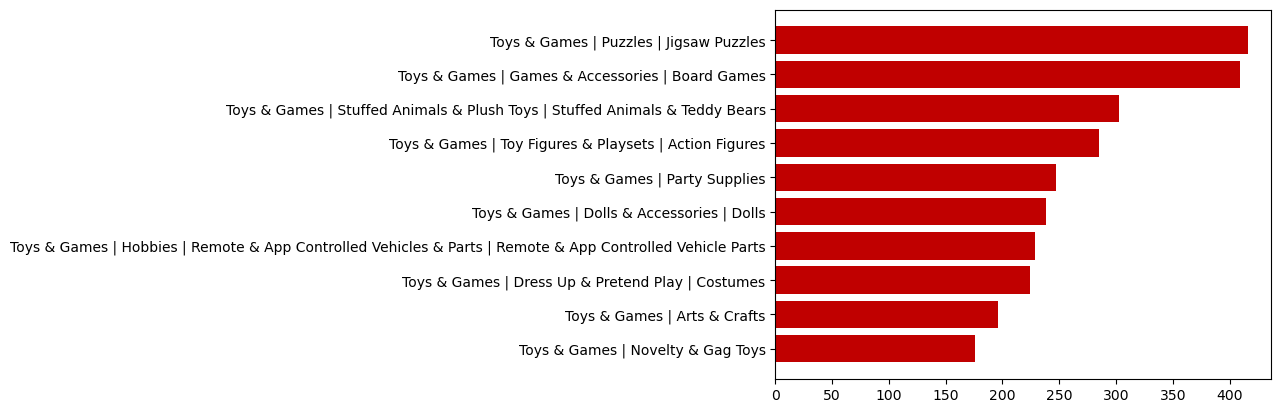

In [29]:
most_ordered_category = ord_pro['Category'].value_counts().head(10)
most_ordered_category = most_ordered_category.reset_index()
most_ordered_category
plt.barh(most_ordered_category['Category'],most_ordered_category['count'], color = "#C00000")
plt.gca().invert_yaxis() 
plt.show()

#### 3. Most Specific Ordered Category

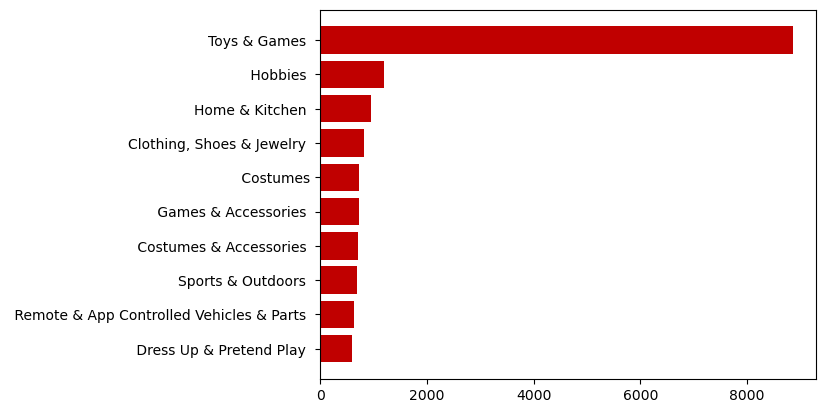

In [30]:
most_specific_ordered_category = ord_cat['Category'].value_counts().head(10).reset_index()

plt.barh(most_specific_ordered_category['Category'],most_specific_ordered_category['count'], color = "#C00000")
plt.gca().invert_yaxis() 
plt.show()

##### Firstly, let's have a look at the platform's main products. From the 2 aboved charts, it can be clearly seen that the most ordered product groups are Toys and Games, but not computer, mobile or video games like Xbox or PS5, but traditional toys and games like Board Games, Puzzles. or items used in small parties such as Costums and Dressups

#### 4. Total Revenue by time

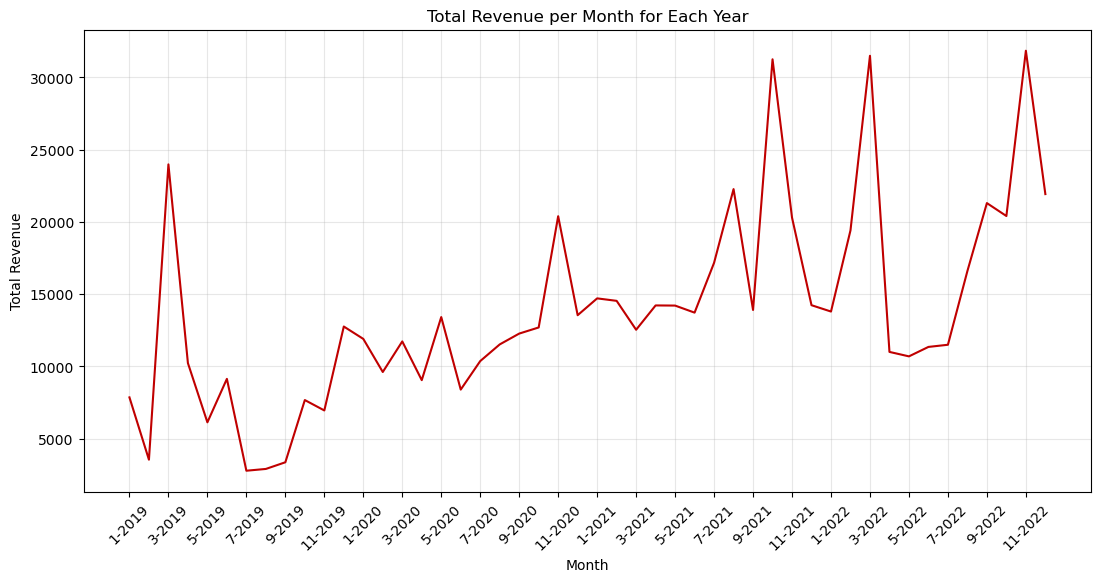

In [31]:
revenue_by_time = ord_pro[['Date','Payment Value']].copy()
revenue_by_time['Year'] = revenue_by_time['Date'].dt.year
revenue_by_time['Month'] = revenue_by_time['Date'].dt.month

revenue_by_time = revenue_by_time.groupby(['Year','Month'])['Payment Value'].sum().reset_index(name='Total Revenue')
revenue_by_time['Month-Year'] = revenue_by_time['Month'].astype(str) + '-' + revenue_by_time['Year'].astype(str)

plt.figure(figsize=(13, 6))
plt.plot(revenue_by_time['Month-Year'], revenue_by_time['Total Revenue'], color = "#C00000")
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Month for Each Year')
plt.grid(True, alpha = 0.3)
plt.xticks(revenue_by_time.index[::2], revenue_by_time['Month-Year'][::2], rotation=45)
plt.show()

##### We can see that the Revenue of the Platform is quite fluctuation over times. The company gain a huge revenue in 3/2019, then fall dramatically at the end of the year (Maybe because of the Covid-19 Pandemic). 
##### However, the Revenue still rised slightly since then. The reason is probably because this is a company in the field of e-commerce, an area less affected by Covid, and even somewhat benefited from the above pandemic. Plus their most ordered categories are Board Games and Puzzles, a great sources of entertainment during the Pandemic




#### 5. Number of Orders over Time

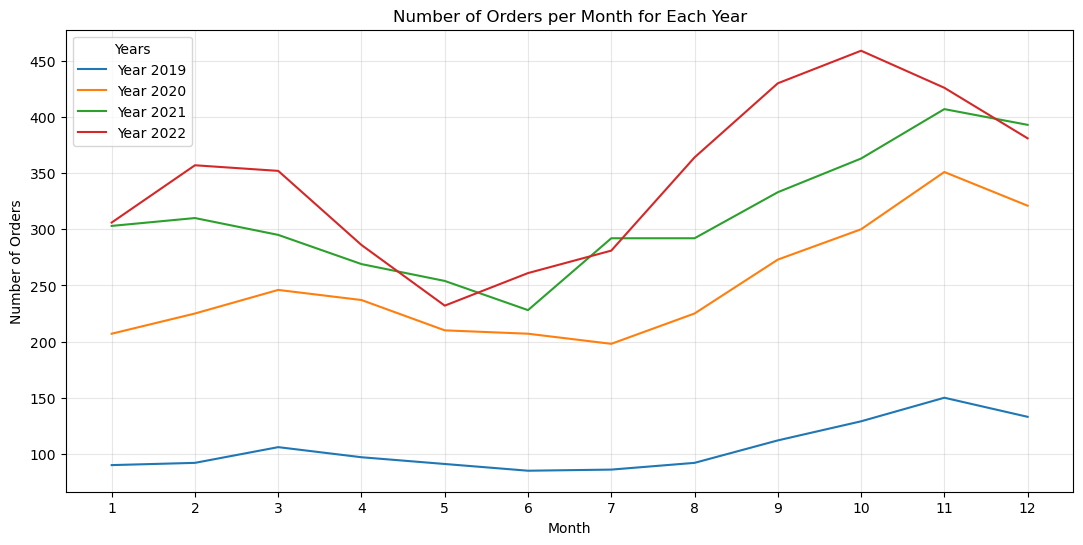

In [32]:
orders_by_time = ord[['Order ID','Date']].copy()
orders_by_time['Year'] = orders_by_time['Date'].dt.year
orders_by_time['Month'] = orders_by_time['Date'].dt.month

orders_by_time = orders_by_time.groupby(['Year','Month']).size().reset_index(name='Number of Orders')

plt.figure(figsize=(13, 6))
for year in orders_by_time['Year'].unique():
    data_year = orders_by_time[orders_by_time['Year'] == year]
    plt.plot(data_year['Month'], data_year['Number of Orders'], label=f'Year {year}')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month for Each Year')
plt.grid(True, alpha = 0.3)
plt.xticks(range(1, 13))
plt.legend(title='Years', loc='upper left')

plt.show()

######

##### Since the line chart of revenue per month of each year shows no importance pattern, I tried to draw the new line chart of total orders per month and each of the year has their own lines. Overall, there is a noticeable upward trend in the number of orders over the years. The remarkable thing is, by comparing the number of orders from month to month from each year, we can see that they have a common trend, which is that the number of orders increases sharply at the beginning and end of the year, while in the summer, the number of orders shows signs of going down
##### The posible reasons might be
##### - Weather: Spring, fall, and winter are seasons with cooler weather, leading people to spend more time indoors. Board games, puzzles, and dress-ups are popular indoor activities during these seasons. While in summerr, people tend to engage more in outdoor activities due to the warmer weather, which may reduce the time spent on indoor activities like board games and puzzles
##### - Holidays: The holiday season in fall and winter, such as Halloween, Thanksgiving, Christmas, and New Year, often involves gatherings, parties, and gift-giving, leading to increased purchases of board games, costumes, and dress-ups. Summer holidays like Fourth of July and Labor Day in the U.S. may focus more on outdoor activities, barbecues, and travel
##### - School break: During spring break, families may look for indoor entertainment options like board games and puzzles, especially if they are not traveling.  In contrast, summer break often involves longer vacations, camps, and outdoor activities.


#### 6. States with most Orders

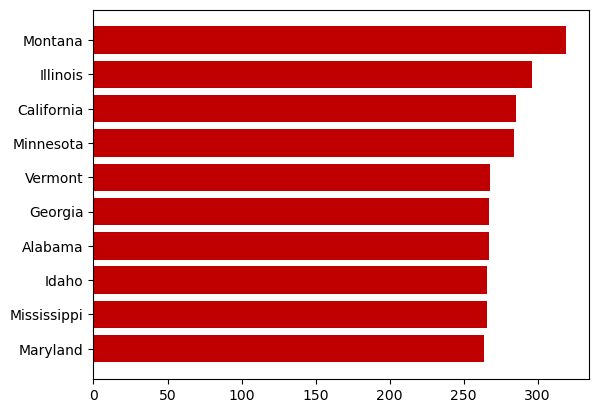

In [33]:
loca = ord_cus['Location'].value_counts().head(10).reset_index()
loca['Order Range'] = pd.cut(loca['count'], [0,190,220,250,280,319], labels = ['< 190', '190 - 220', '220 - 250', '250 - 280', '> 280'])
loca.head(10)

plt.barh(loca['Location'],loca['count'], color = "#C00000")
plt.gca().invert_yaxis() 
plt.show()

##### The four States with most orders are Montana, Illinois, California and Minnesota with the total orders above 280 for each states. For those states, it is suggested to launch loyalty programs to reward frequent customers and encourage repeat purchases. However, I also want to figure out which state has the most potential, so i try to calculate the Increase Percentage of the Orders from each state

In [34]:
orders_by_state_year = ord_cus[['Order ID','Date','Location']].copy()
orders_by_state_year['Year'] = orders_by_state_year['Date'].dt.year

orders_by_state_year = orders_by_state_year.groupby(['Location', 'Year']).size().reset_index(name='Order Count')
orders_by_state_year['Increase Percentage'] = orders_by_state_year.groupby('Location')['Order Count'].pct_change() * 100
orders_by_state_year

,Location,Year,Order Count,Increase Percentage
0,Alabama,2019,26,NaN
1,Alabama,2020,72,176.923077
2,Alabama,2021,88,22.222222
3,Alabama,2022,81,-7.954545
4,Alaska,2019,17,NaN
...,...,...,...,...
195,Wisconsin,2022,79,6.756757
196,Wyoming,2019,23,NaN
197,Wyoming,2020,50,117.391304
198,Wyoming,2021,86,72.000000


In [35]:
average_increase_percentage = orders_by_state_year.groupby('Location')['Increase Percentage'].mean().reset_index(name='Average Increase Percentage')
average_increase_percentage.sort_values('Average Increase Percentage', ascending=False).head(10)

,Location,Average Increase Percentage
41,Tennessee,105.117618
7,Delaware,101.032126
27,Nevada,97.735524
8,Florida,92.226825
20,Massachusetts,90.484011
17,Louisiana,90.374489
14,Iowa,87.446013
1,Alaska,87.238924
13,Indiana,86.473863
33,North Dakota,85.370370


#### 7. Most Order Product

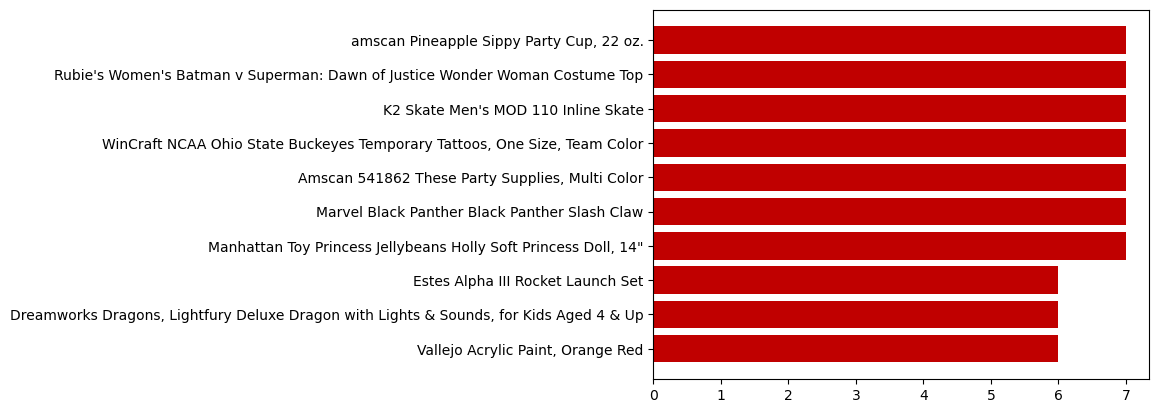

In [36]:
most_ordered_product = ord_pro['Product Name'].value_counts().head(10).reset_index()

plt.barh(most_ordered_product['Product Name'],most_ordered_product['count'], color = "#C00000")
plt.gca().invert_yaxis() 
plt.show()

#### 8. Payment Method Distribution

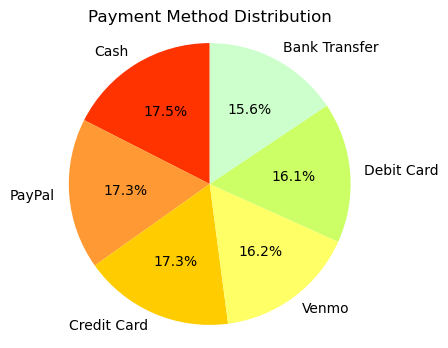

In [37]:
payment_method_dstribution = ord_pro['Payment Method'].value_counts().reset_index()

plt.figure(figsize=(4, 4))
colors = ["#FF3300", "#FF9933", "#FFCC00", "#FFFF66", "#CCFF66","#CCFFCC"]
plt.pie(payment_method_dstribution['count'], labels=payment_method_dstribution['Payment Method'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  
plt.title('Payment Method Distribution')
plt.show()

#### 9. Shipping Type Distribution

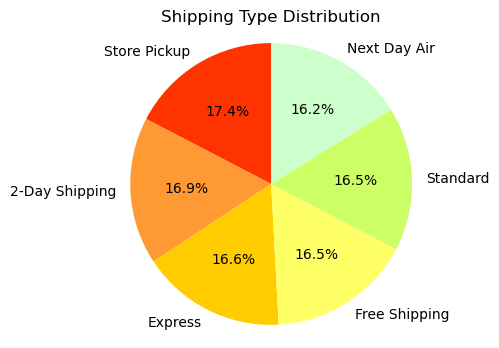

In [38]:
shipping_tyoe_distribution = ord['Shipping Type'].value_counts().reset_index()

plt.figure(figsize=(4, 4))
colors = ["#FF3300", "#FF9933", "#FFCC00", "#FFFF66", "#CCFF66","#CCFFCC"]
plt.pie(shipping_tyoe_distribution['count'], labels=shipping_tyoe_distribution['Shipping Type'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  
plt.title('Shipping Type Distribution')
plt.show()

#### 10. Gender Distribution

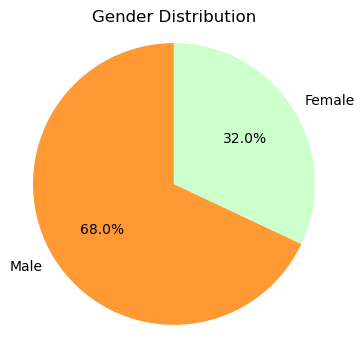

In [39]:
gender_distribution = cus['Gender'].value_counts().reset_index()
plt.figure(figsize=(4, 4))
colors = ["#FF9933","#CCFFCC"]
plt.pie(gender_distribution['count'], labels=gender_distribution['Gender'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  
plt.title('Gender Distribution')
plt.show()

#### 11. Age Group Distribution

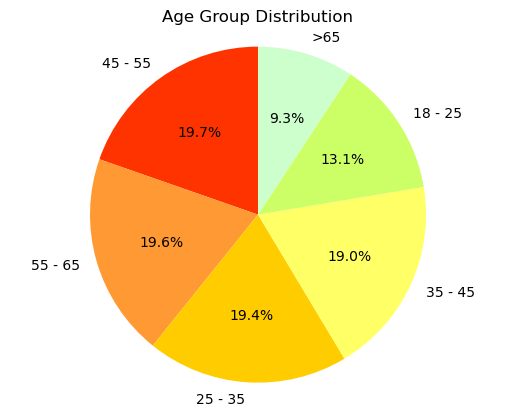

In [40]:
age_group = cus['Age'].reset_index()
age_group['Age Range'] = pd.cut(age_group['Age'], [18,25,35,45,55,65,70], labels = ['18 - 25', '25 - 35', '35 - 45', '45 - 55', '55 - 65', '>65'])
age_group = age_group['Age Range'].value_counts().reset_index()
age_group.sort_values('Age Range', ascending=True)

colors = ["#FF3300", "#FF9933", "#FFCC00", "#FFFF66", "#CCFF66","#CCFFCC"]
plt.pie(age_group['count'], labels=age_group['Age Range'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  
plt.title('Age Group Distribution')
plt.show()

#### 12. Gender Distribution in Age Groups

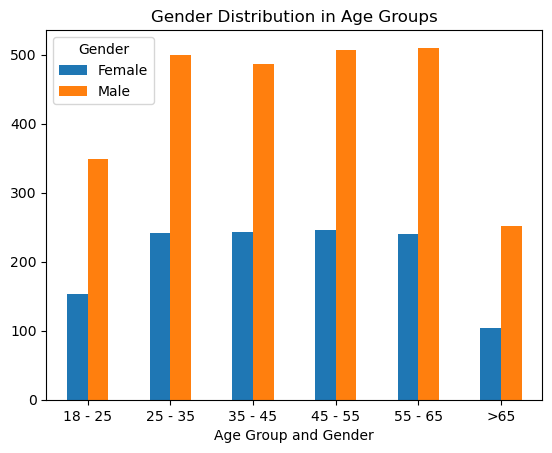

In [41]:
age_gender_group = cus[['Age','Gender']].copy()
age_gender_group['Age Range'] = pd.cut(age_gender_group['Age'], [18,25,35,45,55,65,70], labels = ['18 - 25', '25 - 35', '35 - 45', '45 - 55', '55 - 65', '>65'])
age_gender_group = age_gender_group.groupby(['Age Range', 'Gender'], observed=True).size().reset_index(name='Count')
age_gender_group

age_gender_group.pivot(index='Age Range', columns='Gender', values='Count').plot(kind='bar')
plt.xlabel('Age Group and Gender')
plt.title('Gender Distribution in Age Groups')
plt.xticks(rotation=0)  
plt.legend(title='Gender')
plt.show()

##### From the charts about 'Gender Distribution', 'Age Group Distribution' and 'Gender Distribution in Age Groups', we can see an intersting thing is that in this platform, that í the number of male customers placing orders is much higher than the number of female customers. Besides, we can easily see that the number of customers is spread evenly from the ages of 25 to 65, and the number of customers under 25 and over 65 years old is much lower. Some reason behind this might be:
##### - Those within this age group may have children or be in the stage of life where they are more involved in family activities, so they tend to purchase stuffs like board games and costumes for their children
##### - Younger individuals under 25 may be more inclined towards digital entertainment options, such as video games or streaming services, rather than traditional board games and puzzles.

# Key Insights and Recommandation

### Key Insights

##### - Most ordered product groups are traditional toys and games such as Board Games and Puzzles, as well as items used in small parties like Costumes and Dress-ups
##### - The e-commerce platform witnessed a significant revenue spike in early 2019, followed by a sharp decline later that year, likely influenced by the emergence of the COVID-19 pandemic. Fortunately, there was a gradual recovery in revenue, supported by the e-commerce sector's resilience during the pandemic and the increased demand for entertainment products like board games and puzzles, which is a great source of entertainmening during periods of restricted movement.
##### - There is consistent upward trend in the number of orders over years, which is a good sign. Notably, a pattern emerges where order volumes peak at the beginning and end of each year, while showing a decline during the summer months. This trend can be attributed to seasonal factors like weather conditions favoring indoor activities during cooler months and outdoor pursuits during the summer, as well as holiday-related festivities like Haloween,Thanksgiving, Christmas and school breaks influencing consumer behavior and preferences throughout the year.
##### - The top states with the highest total orders, including Montana, Illinois, California, and Minnesota, could benefit from loyalty programs to enhance customer retention and stimulate repeat purchases. Additionally, an analysis of the Increase Percentage of Orders across different states indicates that Tennessee, Delaware, Nevada, and Florida exhibit the most promising growth potential, consistently doubling their order numbers year over year. These states may present lucrative opportunities for targeted marketing strategies and expansion efforts to capitalize on their increasing order volumes.
##### - Male customers significantly outnumber female customers in placing orders on the platform. Moreover, customer distribution is fairly even among individuals aged 25 to 65, with lower representation from those under 25 and over 65. Some explanations for this pattern might be customers within this age range having children or being actively engaged in family activities, leading to purchases of items like board games and costumes for their families. Additionally, younger individuals below 25 may show a preference for digital entertainment options, such as video games and streaming services, over traditional board games and puzzles.

### Recommendations

##### - Concentrate on targeted marketing efforts that showcase classic toys and games such as board games, puzzles, costumes, and dress-ups, which are the most popular product categories on your platform. Tailor promotions and content to appeal to clients interested in these categories.
##### - Take advantage of seasonal trends by timing your product offers and marketing activities to coincide with peak ordering periods at the start and end of the year. Create themed promotions around holidays like Halloween, Thanksgiving, and Christmas to drive sales and increase customer engagement.
##### - Implement targeted loyalty programs in states with high total order volumes, such as Montana, Illinois, California, and Minnesota, to increase customer retention and encourage repeat purchases. Furthermore, focus on expanding in states such as Tennessee, Delaware, Nevada, and Florida, which have high growth potential based on order increase percentages.
##### - Consider broadening your product variety to cater to a larger market, particularly younger customers under 25 who may prefer digital entertainment options..